In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib.lines import Line2D
import json
from pathlib import Path
import os

In [184]:
###############################################################################
### Matplotlib Settings
###############################################################################

settings = {
    'font.weight' : 'normal',
    'font.size'   : 14
}
plt.rcParams.update(**settings)

# resolution for plots
dpi = 300

current_path = Path.cwd()

# path to csv files
results_path = os.path.join(current_path.parent, '3_results')

# saving path
saving_path = os.path.join(current_path.parent, '4_plots')

In [194]:
##################
### without cf ###
##################
sample_sizes = [100, 1000, 10000]
techs = ['av_sampling','lhc_sampling' ]

D = {}
H = []
for t in techs:
    for s in sample_sizes:
        sample_size = s
        tech = t
        task = 4
        df = pd.read_csv(os.path.join(results_path,'stochastic','task_'+str(task),tech,str(sample_size),'computation_times.csv'))
        H.append(df.iloc[0,1])
        D[t,s] = df.iloc[0,1]

D

{('av_sampling', 100): 45.3553831577301,
 ('av_sampling', 1000): 447.325334072113,
 ('av_sampling', 10000): 4518.979565858841,
 ('lhc_sampling', 100): 45.716262102127075,
 ('lhc_sampling', 1000): 441.54500222206116,
 ('lhc_sampling', 10000): 4646.068951129912}

In [195]:
###############
### WITH CF ###
###############
sample_sizes = [100, 1000, 10000]
AV = []
LHC = []
task = 1
for s in sample_sizes:
    df = pd.read_csv(os.path.join(results_path,'stochastic','task_'+str(task),str(s),'computation_times.csv'))
    AV.append(df.iloc[0,1])

task = 2
for s in sample_sizes:
    df = pd.read_csv(os.path.join(results_path,'stochastic','task_'+str(task),str(s),'computation_times.csv'))
    LHC.append(df.iloc[0,1])

AV

[11.833707094192505, 114.52080011367798, 1157.315949201584]

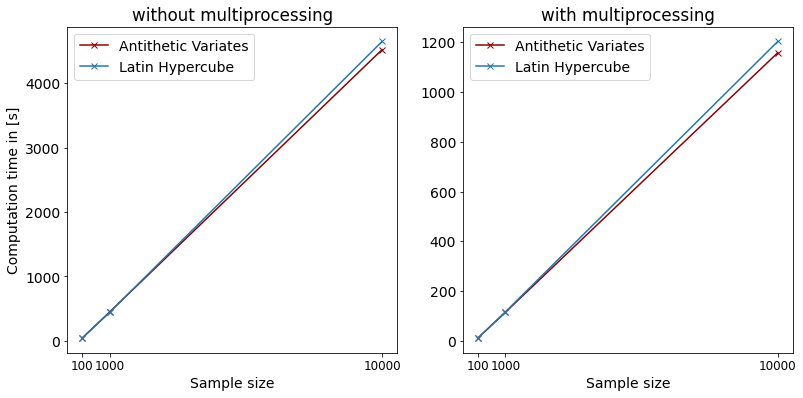

In [187]:

fig1, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,6))


ax1.plot(
    sample_sizes,
    H[0:3],
    label='Antithetic Variates',
    marker='x',
    color='darkred')
ax1.plot(
    sample_sizes,
    H[3:6],
    label='Latin Hypercube',
    marker='x')

ax2.plot(
    sample_sizes,
    AV,
    label='Antithetic Variates',
    marker='x',
    color='darkred')
ax2.plot(
    sample_sizes,
    LHC,
    label='Latin Hypercube',
    marker='x')


ax1.legend()
ax1.set_xlabel('Sample size')
ax1.set_ylabel('Computation time in [s]')
ax1.set_xticks(sample_sizes)
ax1.set_title('without multiprocessing')
ax1.tick_params(axis="x", labelsize=12)

ax2.legend()
ax2.set_xlabel('Sample size')
ax2.set_xticks(sample_sizes)
ax2.set_title('with multiprocessing')
ax2.tick_params(axis="x", labelsize=12);

fig1.savefig(
        os.path.join(saving_path, 'computation_times.png'),
        dpi=dpi,
        bbox_inches='tight'
    )

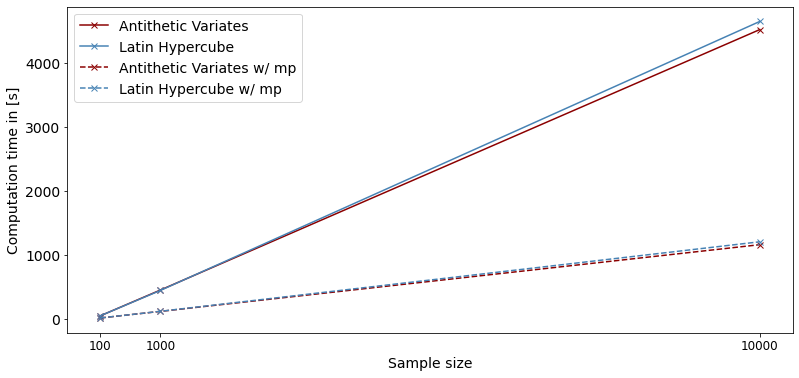

In [206]:
fig5, ax1 = plt.subplots(1,figsize=(13,6))


ax1.plot(
    sample_sizes,
    H[0:3],
    label='Antithetic Variates',
    marker='x',
    color='darkred')
ax1.plot(
    sample_sizes,
    H[3:6],
    label='Latin Hypercube',
    marker='x',
    color = 'steelblue')

ax1.plot(
    sample_sizes,
    AV,
    '--',
    label='Antithetic Variates w/ mp',
    marker='x',
    color='darkred')
ax1.plot(
    sample_sizes,
    LHC, 
    '--',
    label='Latin Hypercube w/ mp',
    marker='x',
    color = 'steelblue')


ax1.legend()
ax1.set_xlabel('Sample size')
ax1.set_ylabel('Computation time in [s]')
ax1.set_xticks(sample_sizes)
#ax1.set_title('without multiprocessing')
ax1.tick_params(axis="x", labelsize=12)

fig5.savefig(
        os.path.join(saving_path, 'computation_times_ver2.png'),
        dpi=dpi,
        bbox_inches='tight'
    )

In [188]:
###################
### Task 5 ########
### Sensitivity ###
###################

In [189]:

charges = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
task = 5
tech = 'av_sampling'
s = 'sensitivity_analysis'
sample_size = 10000
means = []
varss = []
for c in charges:
    df = pd.read_csv(os.path.join(results_path,'stochastic','task_'+str(task),tech,s,str(sample_size),'testing','mean_var_'+str(c)+'_1000.csv'))
    means.append(df.iloc[0,0])
    varss.append(df.iloc[0,1])


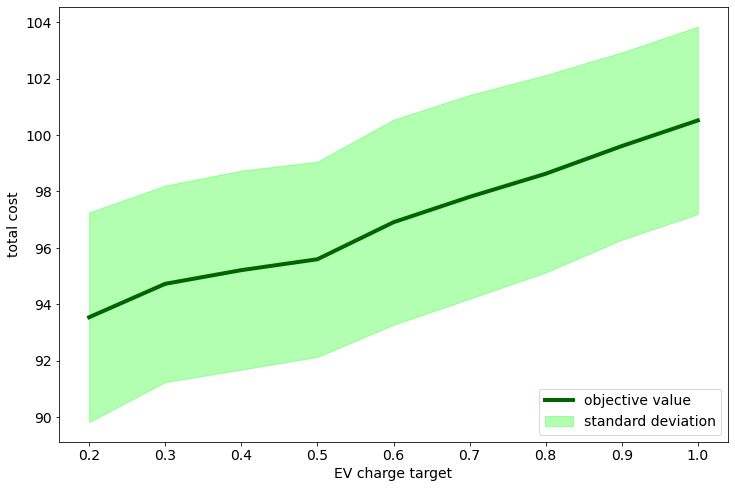

In [205]:
m = np.array(means)
v = np.sqrt(np.array(varss))

fig2 = plt.figure(figsize=(12,8))

plt.plot(charges,means,label='objective value',color='darkgreen',linewidth = 4)
plt.fill_between(charges,m+v,m-v,label='standard deviation',color= 'lime',alpha = 0.3)
plt.xlabel('EV charge target')
plt.ylabel('total cost')
plt.legend(loc = 4);

fig2.savefig(
        os.path.join(saving_path, 'sensitivity_complete.png'),
        dpi=dpi,
        bbox_inches='tight'
    )

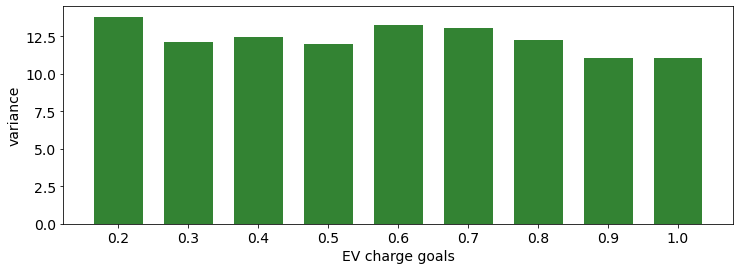

In [191]:
fig3 = plt.figure(figsize=(12,4))

plt.bar(charges,varss,width = 0.07,color='darkgreen',alpha=0.8)
plt.xlabel('EV charge goals')
plt.ylabel('variance')
plt.xticks(charges);

fig3.savefig(
        os.path.join(saving_path, 'sensitivity_variance_extra.png'),
        dpi=dpi,
        bbox_inches='tight'
    )

In [215]:
###################
### TASK 5 ########
### Means & Var ###
###################


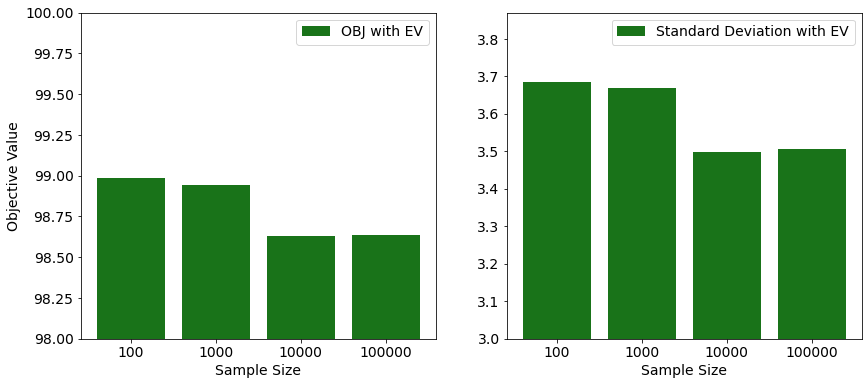

In [214]:
task = 5
tech = 'av_sampling'
sample_sizes = [100, 1000, 10000, 100000]
mean5 = []
vars5 = []
for s in sample_sizes:
    df = pd.read_csv(os.path.join(results_path,'stochastic','task_'+str(task),tech,str(s),'testing','mean_var_0.8_1000.csv'))
    mean5.append(df.iloc[0,0])
    vars5.append(df.iloc[0,1])

fig4,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

ax1.bar(['100','1000','10000','100000'],mean5,label='OBJ with EV',color='darkgreen',alpha=0.9)
ax1.set_ylim(bottom = 98,top = 100)

ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Objective Value')
ax1.legend(loc = 1)

ax2.bar(['100','1000','10000','100000'],np.sqrt(np.array(vars5)),label = 'Standard Deviation with EV',color='darkgreen',alpha=0.9)
ax2.set_ylim(bottom=3)
ax2.set_xlabel('Sample Size')
ax2.legend(loc = 1)


fig4.savefig(
        os.path.join(saving_path, 'task5_a.png'),
        dpi=dpi,
        bbox_inches='tight'
    );